# Proyecto 2: Detección de Fracturas Cervicales en Imágenes de Tomografía Computarizada (TC)
- Brandon Sicay 21757
- Daniel Morales 21785
- Diana Fernández 21747
- Jennifer Toxcón 21276

El diagnóstico rápido y preciso de fracturas en la columna cervical es crucial para evitar el deterioro neurológico y la parálisis en los pacientes, especialmente después de un trauma. Aunque la tomografía computarizada ha reemplazado a los rayos X en la detección de fracturas, la presencia de enfermedades degenerativas y osteoporosis en pacientes de edad avanzada dificulta la identificación precisa de las fracturas. La creciente demanda de análisis rápidos y precisos en la radiología requiere soluciones con IA para mejorar la detección y localización de fracturas en la columna cervical.

La tarea consiste en determinar, a partir de imágenes de TC, si hay fracturas en alguna de las siete vértebras que componen la columna cervical (C1-C7). Se ignoran las fracturas en la base del cráneo, la columna torácica, las costillas y las clavículas.

El modelo debe determinar si hay fracturas y en qué vértebras se producen. Por paciente se esperan 8 resultados: Una para cada una de las siete vértebras cervicales y una «any» que indica si el paciente tiene o no algún tipo de fractura.

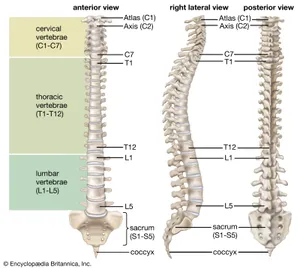

Además de identificar fracturas en las vértebras cervicales, el rendimiento del modelo se evalúa usando una métrica de pérdida logarítmica ponderada (log loss). Esta métrica mide qué tan bien las predicciones probabilísticas del modelo se ajustan a los resultados reales, penalizando más severamente los errores de predicción.

La fórmula del log loss es la siguiente:

$$
L_{ij} = - w_j \left( y_{ij} \log(p_{ij}) + (1 - y_{ij}) \log(1 - p_{ij}) \right)
$$



Donde:

- 𝑦𝑖𝑗 es la etiqueta verdadera para la predicción 𝑗 (1 si hay fractura, 0 si no).
- 𝑝𝑖𝑗 es la probabilidad predicha por el modelo.
- 𝑤𝑗 es el peso asignado a cada tipo de predicción.




#### Pesos

La competencia otorga diferentes pesos a los tipos de predicciones para reflejar su relevancia:

- Fractura negativa en una vértebra: Peso de 1 (menos severo si no hay fractura).
- Fractura positiva en una vértebra: Peso de 2 (más importante si hay fractura en una vértebra).
- Sin fractura en el paciente (global): Peso de 7.
- Fractura positiva en el paciente (global): Peso de 14 (más crítico identificar correctamente si el paciente tiene alguna fractura en general).


### Ejemplo:
Si el modelo falla en predecir correctamente que un paciente tiene una fractura global, el error se multiplica por 14, destacando la importancia de predecir correctamente la fractura global en comparación con la predicción de una vértebra individual.

Esta métrica no solo evalúa si el modelo predice correctamente, sino también la confianza que el modelo tiene en sus predicciones. Los errores en fracturas globales del paciente se penalizan mucho más que en fracturas específicas, resaltando la necesidad de que el modelo sea especialmente preciso en identificar si el paciente tiene fracturas o no.

### Problema científico
¿Cómo puede la IA mejorar la precisión y velocidad en la detección y localización de fracturas en la columna cervical a través de imágenes de tomografía computarizada, igualando o superando el rendimiento de los radiólogos expertos?

### Objetivo General
Desarrollar un modelo capaz de detectar y localizar con precisión fracturas en las vértebras cervicales (C1-C7) utilizando imágenes de tomografía computarizada (CT), con el objetivo de mejorar la velocidad y precisión en el diagnóstico médico.

### Objetivos
- Desarrollar un modelo de aprendizaje automático que detecte y localice fracturas en las siete vértebras cervicales (C1-C7) a partir de imágenes de CT.
- Crear un sistema que pueda identificar la existencia de cualquier fractura vertebral en un paciente con alta precisión.
- Reducir el tiempo de diagnóstico y aumentar la precisión en la identificación de fracturas cervicales en pacientes con imágenes complejas, como aquellos con degeneración o enfermedades óseas.
- Comparar los resultados del modelo con la evaluación de radiólogos para validar su efectividad.

## Descripción del conjunto de datos

El conjunto de datos está compuesto por aproximadamente 3,000 estudios de tomografía computarizada (CT) que cubren las vértebras cervicales (C1-C7) y se obtuvo de 12 sitios diferentes alrededor del mundo. 

Los datos incluyen imágenes en formato DICOM de alta resolución y etiquetas proporcionadas por radiólogos que indican la presencia y localización de fracturas. También se proporcionan segmentaciones de las vértebras mediante un modelo UNET 3D, revisadas por radiólogos para su precisión. Además, se incluye un conjunto de datos de cajas delimitadoras para un subconjunto de las imágenes, con el objetivo de facilitar el entrenamiento del modelo para identificar fracturas específicas.


### Variables

- StudyInstanceUID: ID único del estudio de imagen para cada paciente.

- patient_overall: Indica si existe alguna fractura en cualquier vértebra cervical para el paciente.

- C1, C2, C3, C4, C5, C6, C7: Variables binarias que indican la presencia o ausencia de fracturas en las vértebras específicas.

- StudyInstanceUID: ID único del estudio de imagen.

- x y y: Coordenadas mínimas de la caja delimitadora que encierra la fractura.

- width: Coordenadas máximas de la caja delimitadora.

- C1, C2, C3, C4, C5, C6, C7: Identificadores de las vértebras en las que se encuentran las fracturas C1-C7.

- row_id: ID único correspondiente a la predicción.

- fractured: La probabilidad de que haya una fractura en la vértebra o en el paciente (patient_overall).


In [105]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg


   ---------------------------------------- 0.0/335.3 kB ? eta -:--:--
   -- ------------------------------------ 20.5/335.3 kB 320.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/335.3 kB 393.8 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/335.3 kB 558.5 kB/s eta 0:00:01
   ----------------- -------------------- 153.6/335.3 kB 833.5 kB/s eta 0:00:01
   ----------------------- -------------- 204.8/335.3 kB 958.4 kB/s eta 0:00:01
   ---------------------------------- ----- 286.7/335.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  327.7/335.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 335.3/335.3 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install gdcm==3.0.10

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement gdcm==3.0.10 (from versions: 1.0, 1.1)
ERROR: No matching distribution found for gdcm==3.0.10

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import pydicom
import pylibjpeg
import glob
import nibabel as nib
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import backend as K
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns

In [2]:
# Leer los archivos CSV
train_df = pd.read_csv('./rsna-2022-cervical-spine-fracture-detection/train.csv')
test_df= pd.read_csv('./rsna-2022-cervical-spine-fracture-detection/test.csv')
meta_train = pd.read_csv('./rsna-2022-spine-fracture-detection-metadata/meta_train.csv')
train_bounding_boxes= pd.read_csv('./rsna-2022-cervical-spine-fracture-detection/train_bounding_boxes.csv')
sample_submission = pd.read_csv('./rsna-2022-cervical-spine-fracture-detection/sample_submission.csv')
meta_segmentation = pd.read_csv("./rsna-2022-spine-fracture-detection-metadata/meta_segmentation.csv")
ss = pd.read_csv('./rsna-2022-cervical-spine-fracture-detection/sample_submission.csv')


In [6]:
print("Train data:")
print(train_df.head())

Train data:
            StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0   1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1  1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0
2  1.2.826.0.1.3680043.21561                1   0   1   0   0   0   0   0
3  1.2.826.0.1.3680043.12351                0   0   0   0   0   0   0   0
4   1.2.826.0.1.3680043.1363                1   0   0   0   0   1   0   0


In [7]:
train_df

StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0      1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1     1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0
2     1.2.826.0.1.3680043.21561                1   0   1   0   0   0   0   0
3     1.2.826.0.1.3680043.12351                0   0   0   0   0   0   0   0
4      1.2.826.0.1.3680043.1363                1   0   0   0   0   1   0   0
...                         ...              ...  ..  ..  ..  ..  ..  ..  ..
2014  1.2.826.0.1.3680043.21684                1   0   1   0   0   0   1   1
2015   1.2.826.0.1.3680043.4786                1   0   0   0   0   0   0   1
2016  1.2.826.0.1.3680043.14341                0   0   0   0   0   0   0   0
2017  1.2.826.0.1.3680043.12053                0   0   0   0   0   0   0   0
2018  1.2.826.0.1.3680043.18786                1   0   0   0   0   0   0   1

[2019 rows x 9 columns]

In [8]:
# Ver las primeras filas de cada DataFrame
print("Train data:")
print(test_df.head())

Train data:
                         row_id           StudyInstanceUID prediction_type
0  1.2.826.0.1.3680043.10197_C1  1.2.826.0.1.3680043.10197              C1
1  1.2.826.0.1.3680043.10454_C1  1.2.826.0.1.3680043.10454              C1
2  1.2.826.0.1.3680043.10690_C1  1.2.826.0.1.3680043.10690              C1


- StudyInstanceUID: ID único del estudio de imagen para cada paciente.

- patient_overall: Indica si existe alguna fractura en cualquier vértebra cervical para el paciente.

- C1, C2, C3, C4, C5, C6, C7: Variables binarias que indican la presencia o ausencia de fracturas en las vértebras específicas.

In [9]:
test_df

row_id           StudyInstanceUID prediction_type
0  1.2.826.0.1.3680043.10197_C1  1.2.826.0.1.3680043.10197              C1
1  1.2.826.0.1.3680043.10454_C1  1.2.826.0.1.3680043.10454              C1
2  1.2.826.0.1.3680043.10690_C1  1.2.826.0.1.3680043.10690              C1

- row_id: El ID de la fila. Coincidirá con la misma columna del archivo de envío de muestras.
- StudyInstanceUID: ID del estudio que es único para cada exploración de paciente.
- prediction_type: Cuál de las ocho columnas objetivo necesita una predicción en esta fila.

In [10]:
train_bounding_boxes

StudyInstanceUID          x          y     width    height  \
0     1.2.826.0.1.3680043.10051  219.27715  216.71419  17.30440  20.38517   
1     1.2.826.0.1.3680043.10051  221.56460  216.71419  17.87844  25.24362   
2     1.2.826.0.1.3680043.10051  216.82151  221.62546  27.00959  26.37454   
3     1.2.826.0.1.3680043.10051  214.49455  215.48637  27.92726  37.51363   
4     1.2.826.0.1.3680043.10051  214.00000  215.48637  27.00000  43.51363   
...                         ...        ...        ...       ...       ...   
7212   1.2.826.0.1.3680043.9940  297.23186  115.53983  85.18228  66.52623   
7213   1.2.826.0.1.3680043.9940  298.00000  117.00000  86.00000  61.00000   
7214   1.2.826.0.1.3680043.9940  298.00000  119.00000  87.00000  58.00000   
7215   1.2.826.0.1.3680043.9940  299.00000  120.00000  89.00000  56.00000   
7216   1.2.826.0.1.3680043.9940  299.04425  121.88319  89.71326  53.46549   

      slice_number  
0              133  
1              134  
2              135  
3              136  
4              137  
...            ...  
7212           140  
7213           141  
7214           142  
7215           143  
7216           144  

[7217 rows x 6 columns]

- StudyInstanceUID: ID del estudio que es único para cada paciente escaneado.
- x: coordenada x de la esquina inferior izquierda del cuadro delimitador.
- y: coordenada y de la esquina inferior izquierda del cuadro delimitador.
- width: anchura del cuadro delimitador
- height: altura del cuadro delimitador
- slice_number: número de corte del escaneado

In [11]:
# Ver las primeras filas de cada DataFrame
print("Sample submission:")
print(sample_submission.head())

Sample submission:
                         row_id  fractured
0  1.2.826.0.1.3680043.10197_C1        0.5
1  1.2.826.0.1.3680043.10454_C1        0.5
2  1.2.826.0.1.3680043.10690_C1        0.5


In [12]:
sample_submission

row_id  fractured
0  1.2.826.0.1.3680043.10197_C1        0.5
1  1.2.826.0.1.3680043.10454_C1        0.5
2  1.2.826.0.1.3680043.10690_C1        0.5

- row_id: Único para cada escaneo de paciente incluyendo las vértebras afectadas.
- fractured: Columna objetivo con predicción.

## Análisis exploratorio

Análisis 

El desglose global de los datos es 1058 (52,4% sin fractura) y 961 (47,6% con fractura). De los pacientes con fracturas, hay varios que tienen más de una.

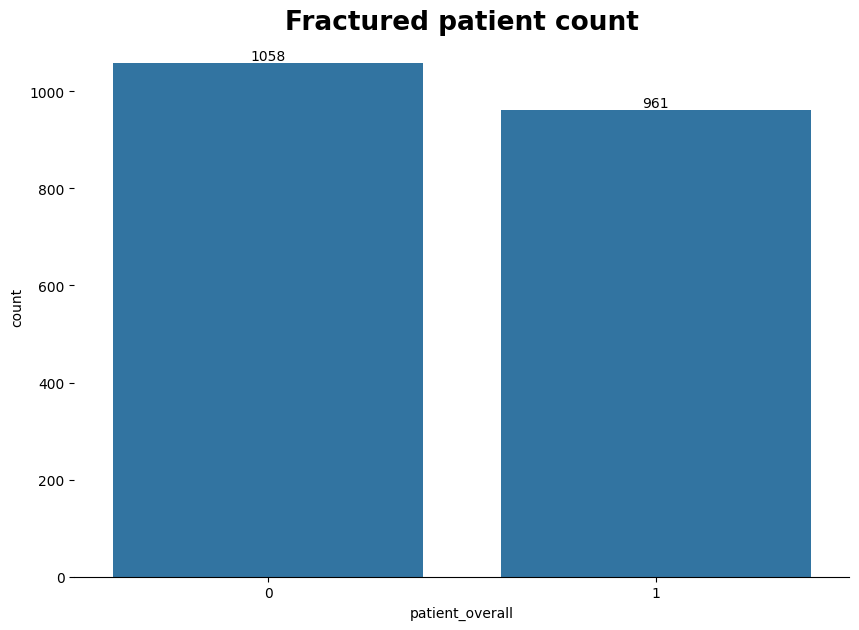

In [13]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=train_df, x="patient_overall")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Fractured patient count", weight="bold", size=19)
sns.despine(right=True, top=True, left=True);

(0.0, 2800.0)

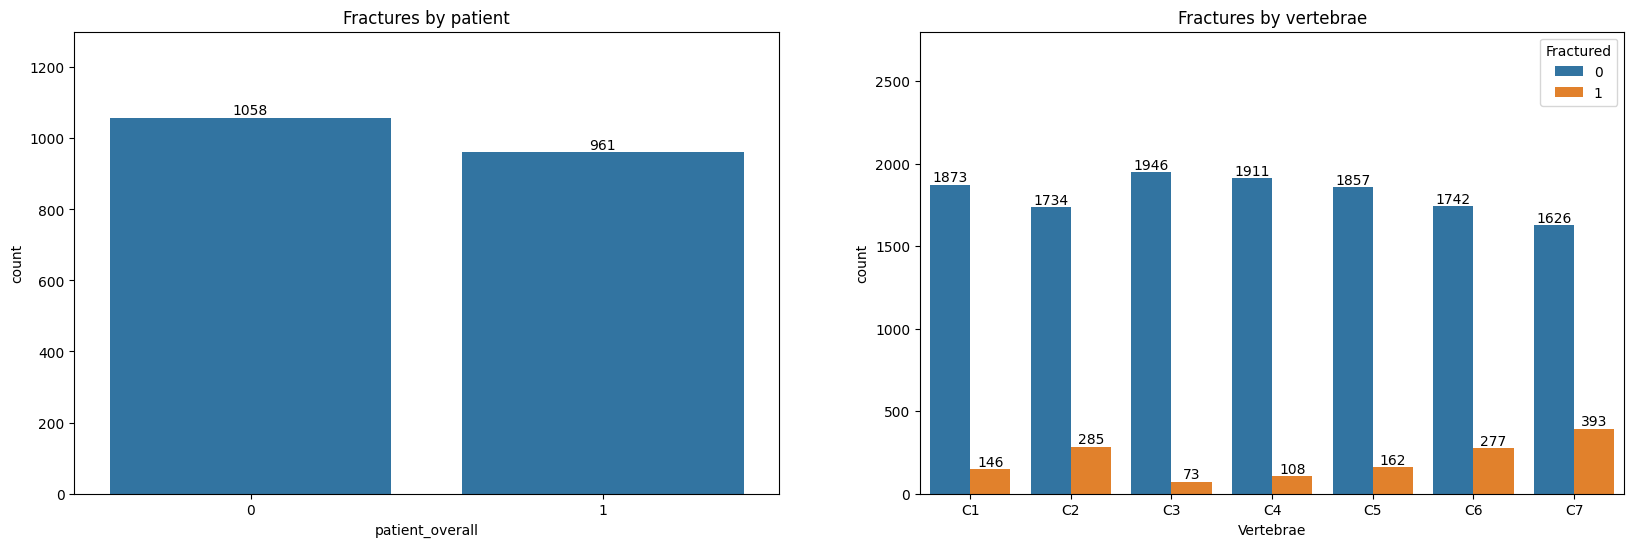

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax1 = sns.countplot(data=train_df, x='patient_overall')
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Fractures by patient')
plt.ylim([0,1300])

# Unpivot train_df for plotting
train_melt = pd.melt(train_df, id_vars = ['StudyInstanceUID', 'patient_overall'],
             value_vars = ['C1','C2','C3','C4','C5','C6','C7'],
             var_name="Vertebrae",
             value_name="Fractured")

plt.subplot(1,2,2)
ax2 = sns.countplot(data=train_melt, x='Vertebrae', hue='Fractured')
for container in ax2.containers:
    ax2.bar_label(container)
plt.title('Fractures by vertebrae')
plt.ylim([0,2800])


La mayoría de las fracturas aparecen en las vértebras superiores e inferiores, siendo C7 (27,22%) y C2 (19,74%) las que presentan la mayor proporción. C3 (5,06%) y C4 (7,48%) tienen la porción más baja.

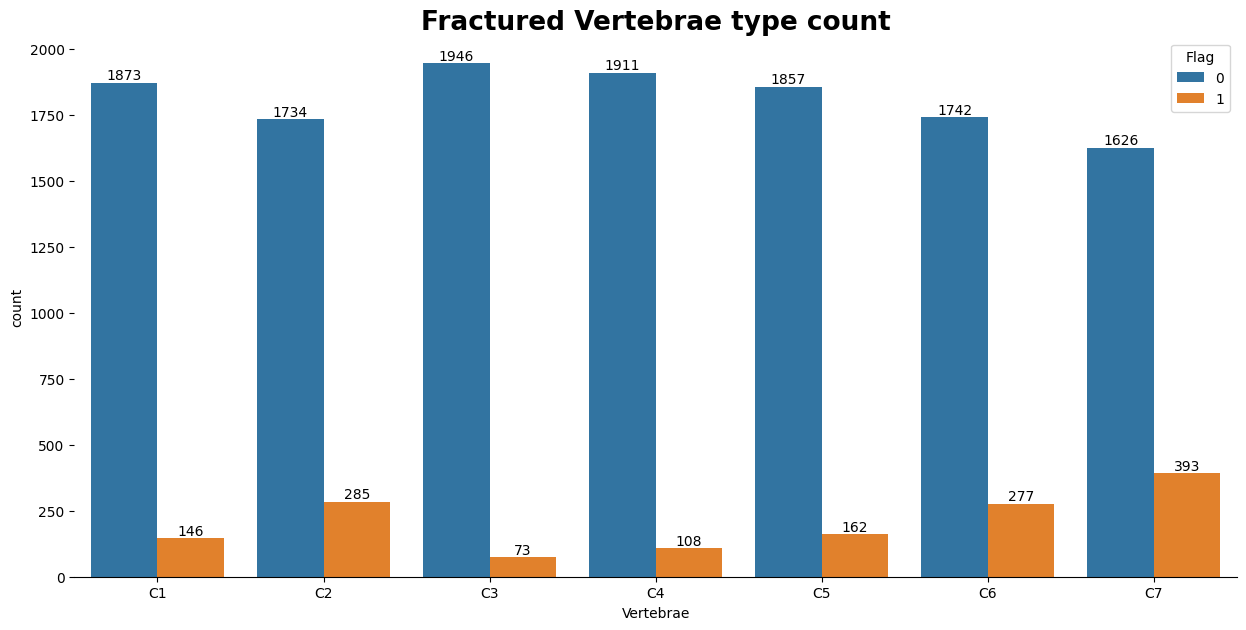

In [15]:
data_count = pd.melt(train_df, 
             id_vars=['StudyInstanceUID', 'patient_overall'],
             var_name="Vertebrae",
             value_name="Flag")

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=data_count, x="Vertebrae", hue="Flag")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Fractured Vertebrae type count", weight="bold", size=19)
sns.despine(right=True, top=True, left=True);

In [16]:
percentage_table = data_count[["Vertebrae","Flag"]].groupby("Vertebrae").sum()
percentage_table["percentage"] = np.round((percentage_table["Flag"] / percentage_table["Flag"].sum())*100,2)
percentage_table

Flag  percentage
Vertebrae                  
C1          146       10.11
C2          285       19.74
C3           73        5.06
C4          108        7.48
C5          162       11.22
C6          277       19.18
C7          393       27.22

Si un paciente tiene varias fracturas, es más probable que estén en una vértebra limítrofe. Por ejemplo, es más probable que una fractura en C1 esté junto a una fractura en C2 que en C5.

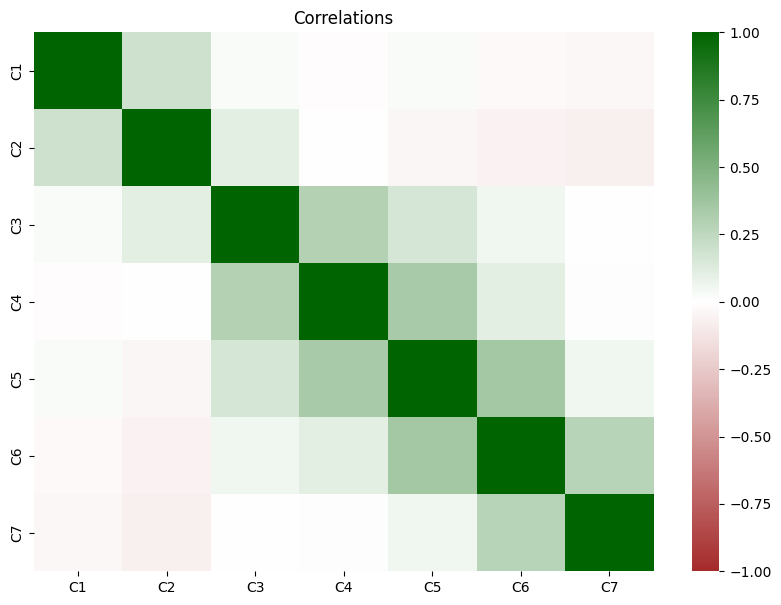

In [17]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10,7))

# Crear un colormap personalizado
colors = [(165/255, 42/255, 42/255), (1, 1, 1), (0, 100/255, 0)]  # Rojo oscuro -> Blanco -> Verde oscuro
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

corr = train_df[['C1','C2','C3','C4','C5','C6','C7']].corr()

# Graficar el heatmap con el nuevo colormap
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1)

plt.title('Correlations')
plt.show()

### ID de los pacientes
Cada paciente tiene un ID único que se utiliza para identificarlo. Este es también el ID que debe utilizarse para la salida (envío) en combinación con las vértebras y la evaluación global 

In [18]:
for x in range(20):
    print(train_df["StudyInstanceUID"][x])

1.2.826.0.1.3680043.6200
1.2.826.0.1.3680043.27262
1.2.826.0.1.3680043.21561
1.2.826.0.1.3680043.12351
1.2.826.0.1.3680043.1363
1.2.826.0.1.3680043.4859
1.2.826.0.1.3680043.18659
1.2.826.0.1.3680043.17364
1.2.826.0.1.3680043.849
1.2.826.0.1.3680043.24045
1.2.826.0.1.3680043.4744
1.2.826.0.1.3680043.15773
1.2.826.0.1.3680043.24946
1.2.826.0.1.3680043.9290
1.2.826.0.1.3680043.5482
1.2.826.0.1.3680043.11090
1.2.826.0.1.3680043.13810
1.2.826.0.1.3680043.28252
1.2.826.0.1.3680043.26052
1.2.826.0.1.3680043.4131


Al mirar los ID de los estudios, surge la suposición de que sólo los números después del último período son únicos (samuelcortinhas, 2022).

In [19]:
for i in range(7):
    print(train_df['StudyInstanceUID'].map(lambda x : x.split('.')[i]).unique())

['1']
['2']
['826']
['0']
['1']
['3680043']
['6200' '27262' '21561' ... '14341' '12053' '18786']


Referencias

Cortinhas, S. (2022). RSNA Fracture Detection - in-depth EDA. https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda

Mayo Clinic. (2024). Fracturas (huesos fracturados). https://www.mayoclinic.org/es/first-aid/first-aid-fractures/basics/art-20056641

## Resultados Iniciales


### ¿Qué es DICOM?

Un archivo .dcm sigue el formato Digital Imaging and Communications in Medicine (DICOM). Es el formato estándar utilizado para almacenar imágenes médicas y metadatos relacionados. Se puede utiñizar la biblioteca de pydicom para abrir y explorar los archivos de entrenamiento

In [20]:
import pydicom

ex_path = "./rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.10001/101.dcm"
dcm_example = pydicom.dcmread(ex_path)
print(dcm_example)


Dataset.file_meta -------------------------------
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10001.1.101
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10001.1.101
(0008,0023) Content Date                        DA: '20220727'
(0008,0033) Content Time                        TM: '175846.512627'
(0010,0010) Patient's Name                      PN: '10001'
(0010,0020) Patient ID                          LO: '10001'
(0018,0050) Slice Thickness                     DS: '0.625000'
(0020,000D) Study Instance UID                  UI: 1.2.826.0.1.36800

Los datos se guardan en el array Dataset.file_meta
- Row y columns indican el tamaño de la imagen
- Pixel Spacing y Slice Thinckness indican el tamaño de grosor del pixel
- Window Center y Window Width informan sobre el brillo y el contraste de la imagen, respectivamente
- Rescale Intercept y Rescale Slope determinan el rango de valores de los píxeles
- ImagePositionPatient indica las coordenadas x, y, y z de la esquina superior izquierda de cada imagen en mm
- InstanceNumber es el número de corte

### Explorar imágenes

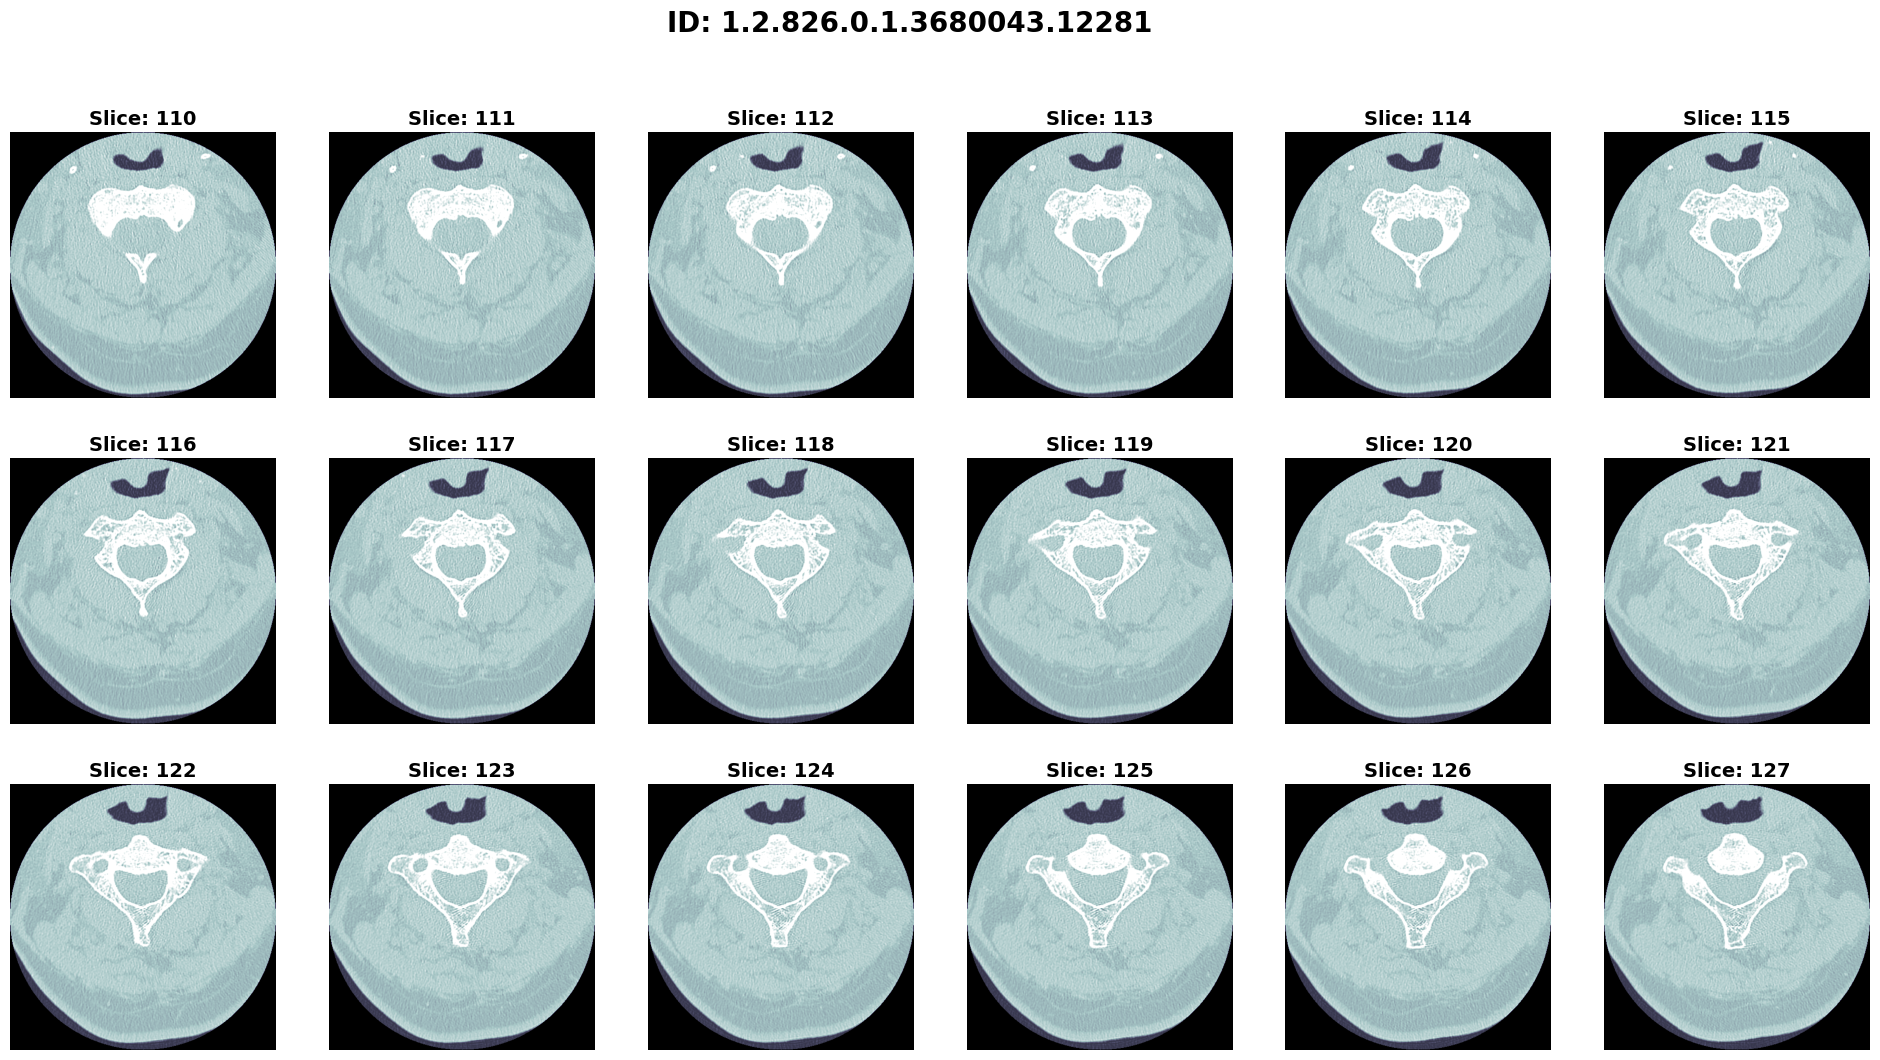

In [3]:
import pydicom
from glob import glob
import re
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Adapted from https://www.kaggle.com/code/andradaolteanu/rsna-fracture-detection-dicom-images-explore
base_path = "./rsna-2022-cervical-spine-fracture-detection"
patient_id = '1.2.826.0.1.3680043.12281'
dcm_paths = glob(f"{base_path}/train_images/{patient_id}/*")  # Usando glob.glob()

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]

dcm_paths.sort(key=natural_keys)

# Get images
files = [pydicom.dcmread(path) for path in dcm_paths]
images = [apply_voi_lut(file.pixel_array, file) for file in files]

# Plot images
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24,12))
fig.suptitle(f'ID: {patient_id}', weight="bold", size=20)

start = 110
for i in range(start, start+18):
    img = images[i]
    file = files[i]
    slice_no = i

    # Plot the image
    x = (i-start) // 6
    y = (i-start) % 6

    axes[x, y].imshow(img, cmap="bone")
    axes[x, y].set_title(f"Slice: {slice_no}", fontsize=14, weight='bold')
    axes[x, y].axis('off')

plt.show()


Se puede observar imagenes de una tomografía, pero realmente se descnoce la vértebra de cada imagen, para ello se podría utilizar segmentaciones para poder realizar el proceso

Un archivo .nii sigue el formato de la Neuroimaging Informatics Technology Initiative (NIfTI). Comparado con DICOM, NIfTI es más sencillo y fácil de soportar.

In [4]:
import nibabel as nib  # Usamos nibabel

# Ruta al archivo .nii
ex_path2 = f"./rsna-2022-cervical-spine-fracture-detection/segmentations/{patient_id}.nii"

# Cargar archivo NIfTI
nii_example = nib.load(ex_path2)

# Convertir a un array de numpy
seg = nii_example.get_fdata()

# Ver la forma de los datos
seg.shape


(512, 512, 331)

In [5]:
# Align orientation with images
seg = seg[:, ::-1, ::-1].transpose(2, 1, 0)
seg.shape

(331, 512, 512)

### Explorando las mascaras

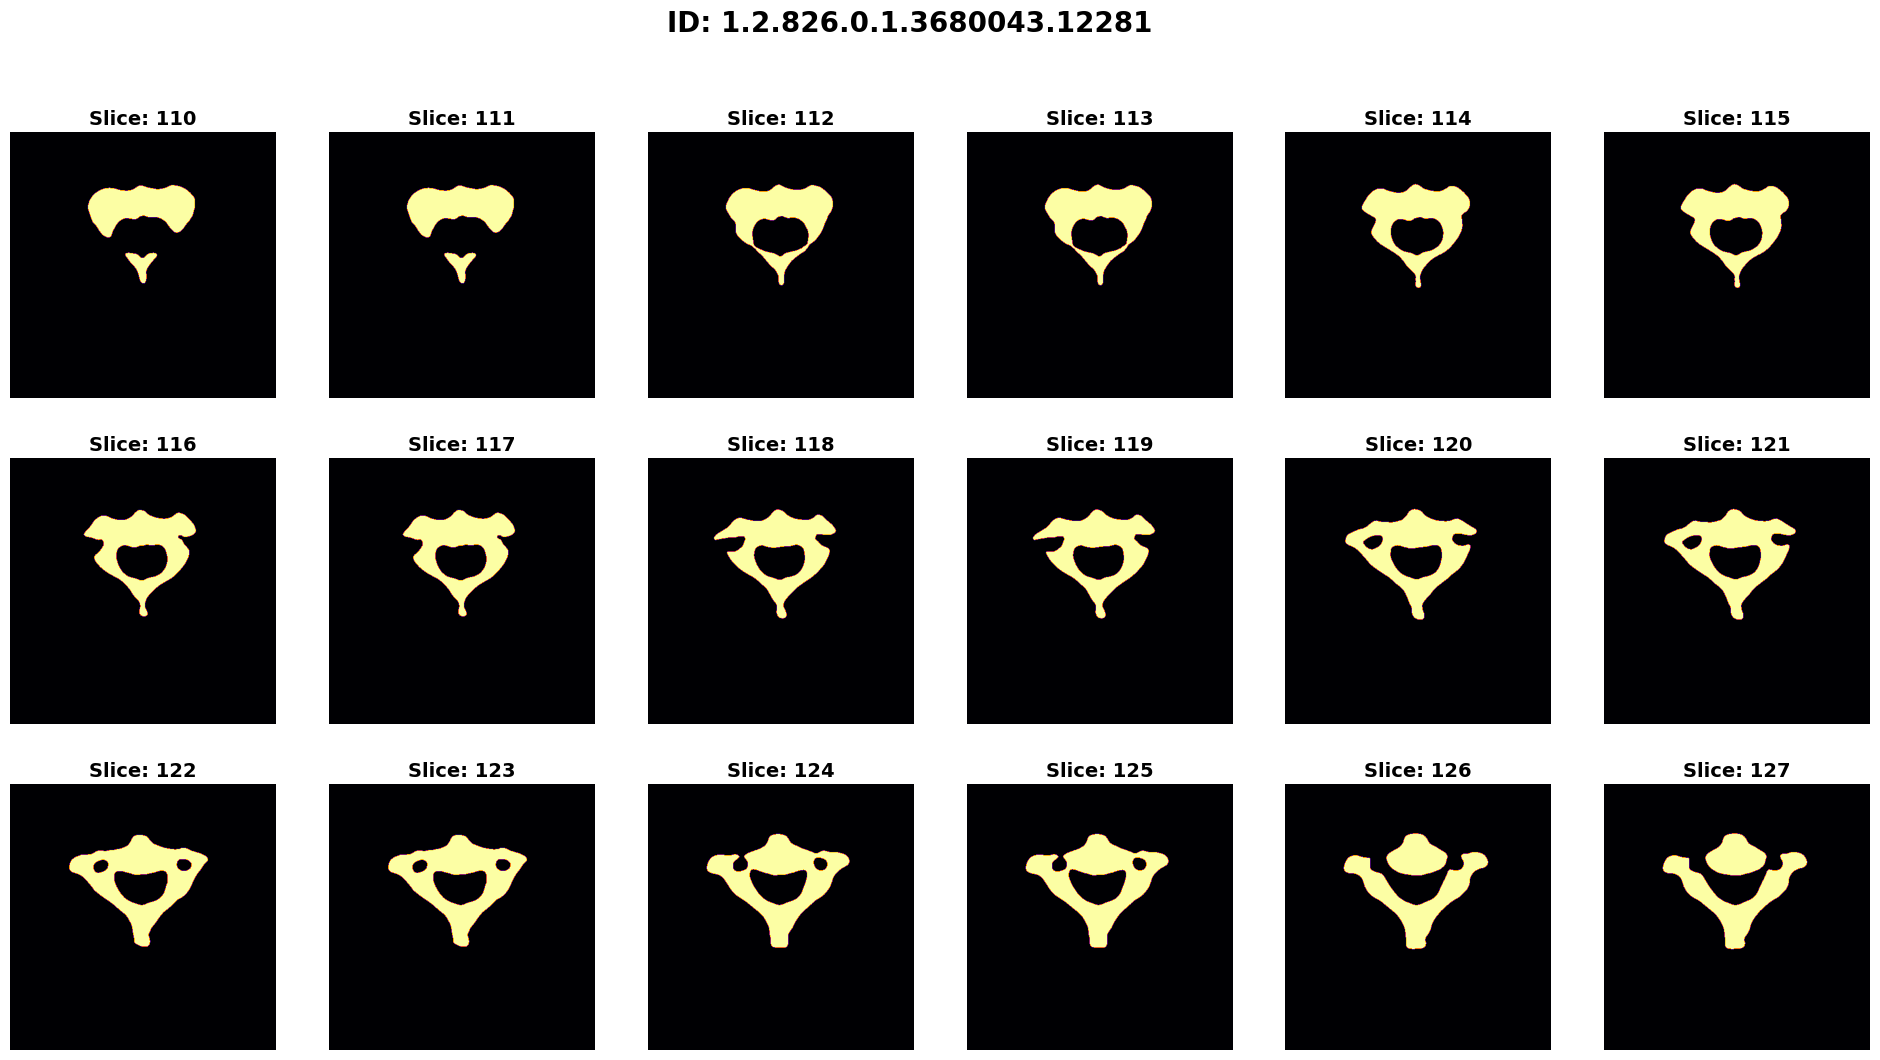

In [6]:
# Plot images
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24,12))
fig.suptitle(f'ID: {patient_id}', weight="bold", size=20)

for i in range(start,start+18):
    mask = seg[i]
    slice_no = i

    # Plot the image
    x = (i-start) // 6
    y = (i-start) % 6

    axes[x, y].imshow(mask, cmap='inferno')
    axes[x, y].set_title(f"Slice: {slice_no}", fontsize=14, weight='bold')
    axes[x, y].axis('off')


En estás máscaras se encuentra la localización de las vértebras, lo que es muy útil porque se conoce que las fracturas sólo pueden producirse en estas regiones.

También indican qué vértebras aparecen en las imágenes. Mirando los valores únicos en cada corte, se encuentra un 0 para el fondo y otro número como 2 para la vértebra C2.

In [7]:
np.unique(seg[116])


array([0., 2.])

Desafortunadamente, no se tiene segmentaciones para todo el conjunto de trenes. Extraer las vértebras C1 a C7 a través de valores únicos en las máscaras de segmentación.
Sin embargo, no todas las imágenes tienen máscaras de segmentación.

Así que se opto por una búsqueda en internet en donde se encontro la información en un estado aceptable para poder entrenar el modelo.

## EDA

Text(0.5, 1.02, 'Image sizes in train images')

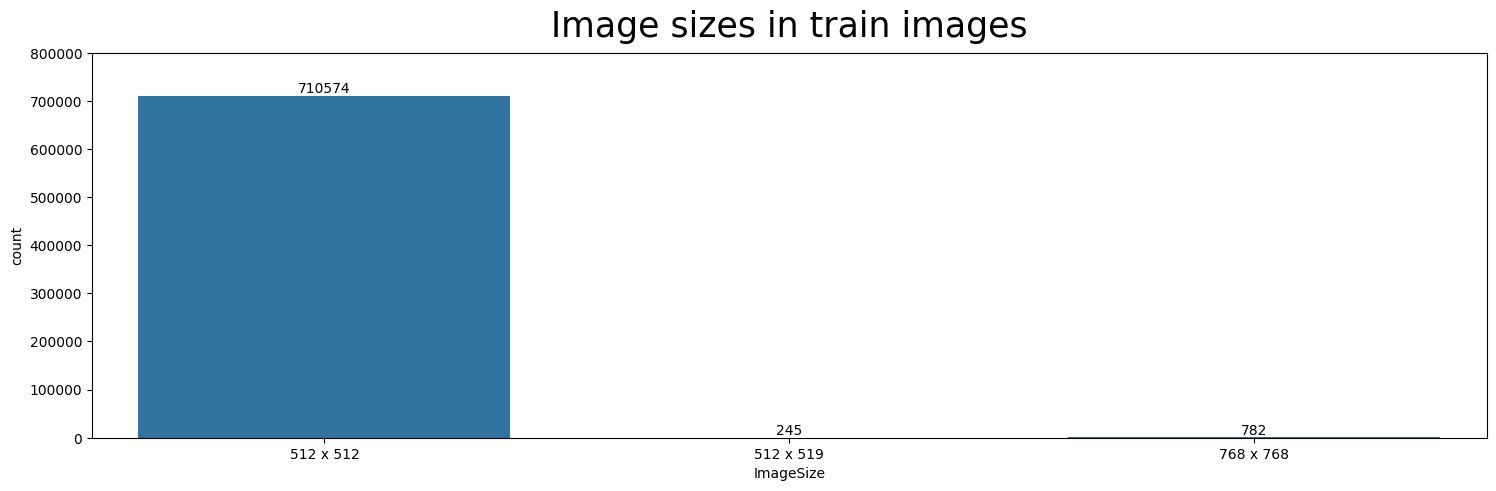

In [38]:
# Image size
meta_train["ImageSize"] = meta_train["Rows"].astype(str) + " x " + meta_train["Columns"].astype(str)

# Plot image sizes
plt.figure(figsize=(18, 5))
ax = sns.countplot(data=meta_train, x="ImageSize")
for container in ax.containers:
    ax.bar_label(container)
plt.ylim([0,800000])
plt.title('Image sizes in train images', fontsize=25, y=1.02)


In [39]:
# Unique values
meta_train['ContentDate'].unique()


array([20220727], dtype=int64)

In [40]:
meta_train.drop('ContentDate', axis=1, inplace=True)


In [41]:
meta_train["SliceThickness"].unique()


array([1.        , 0.5       , 0.625     , 0.6       , 0.67      ,
       0.9       , 0.8       , 0.488281  , 0.75      , 0.664062  ,
       0.60000002])

C:\Users\Jennifer\AppData\Local\Temp\ipykernel_22048\1607000787.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0.488','0.500','0.600','0.60...2','0.625','0.664','0.670','0.75','0.800','0.900','1.000'])


Text(0.5, 1.02, 'Slice thickness distribution')

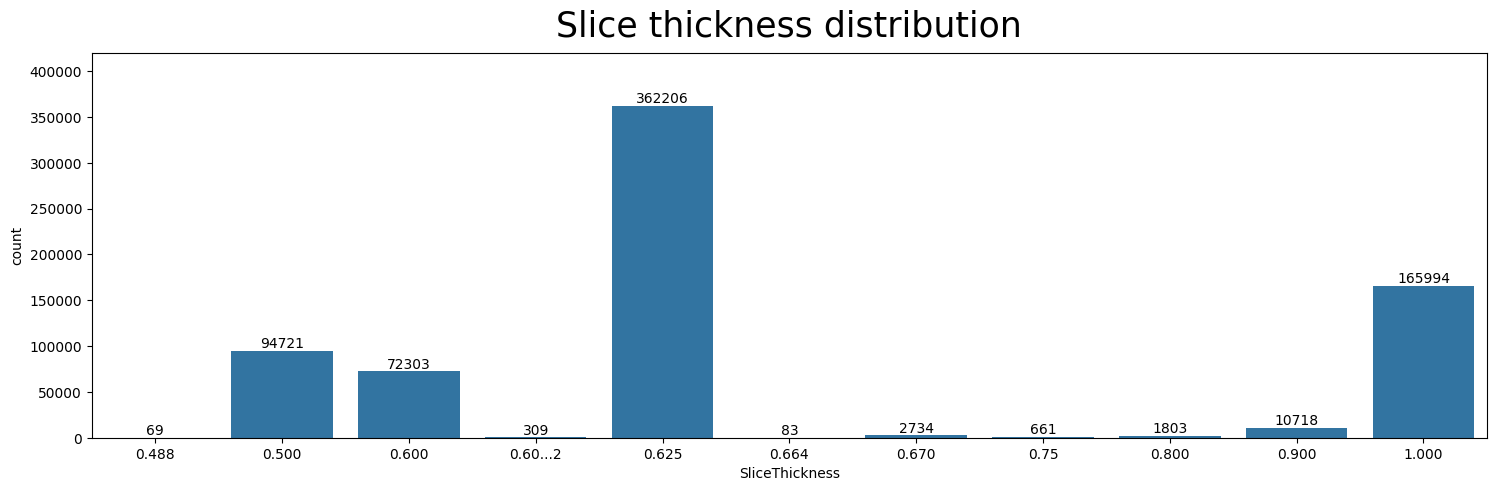

In [42]:
# Plot slice thickness
plt.figure(figsize=(18, 5))
ax = sns.countplot(data=meta_train, x="SliceThickness")
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(['0.488','0.500','0.600','0.60...2','0.625','0.664','0.670','0.75','0.800','0.900','1.000'])
plt.ylim([0,420000])
plt.title('Slice thickness distribution', fontsize=25, y=1.02)


Text(0.5, 0, 'Number of Slices')

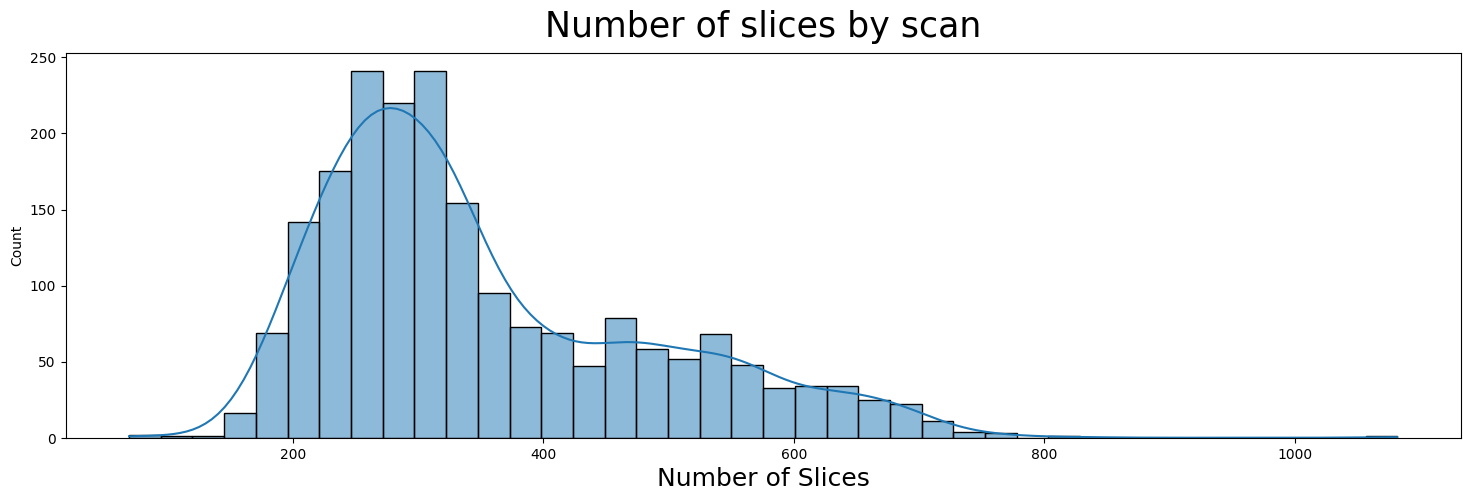

In [46]:
# Slice counts
slice_counts = meta_train_clean["StudyInstanceUID"].value_counts().reset_index()
slice_counts.columns = ["StudyInstanceUID", "count"]

# Distribution of slices counts
plt.figure(figsize=(18, 5))
sns.histplot(data=slice_counts, x="count", kde=True, bins=40)
plt.title("Number of slices by scan", size=25, y=1.02)
plt.xlabel("Number of Slices", size = 18)


In [47]:
# Extract x, y, z coordinates of position vector
meta_train['ImagePositionPatient_x'] = meta_train['ImagePositionPatient'].apply(lambda x: float(x.replace(',','').replace(']','').replace('[','').split()[0]))
meta_train['ImagePositionPatient_y'] = meta_train['ImagePositionPatient'].apply(lambda x: float(x.replace(',','').replace(']','').replace('[','').split()[1]))
meta_train['ImagePositionPatient_z'] = meta_train['ImagePositionPatient'].apply(lambda x: float(x.replace(',','').replace(']','').replace('[','').split()[2]))

Text(0.5, 1.02, 'z-coordinate')

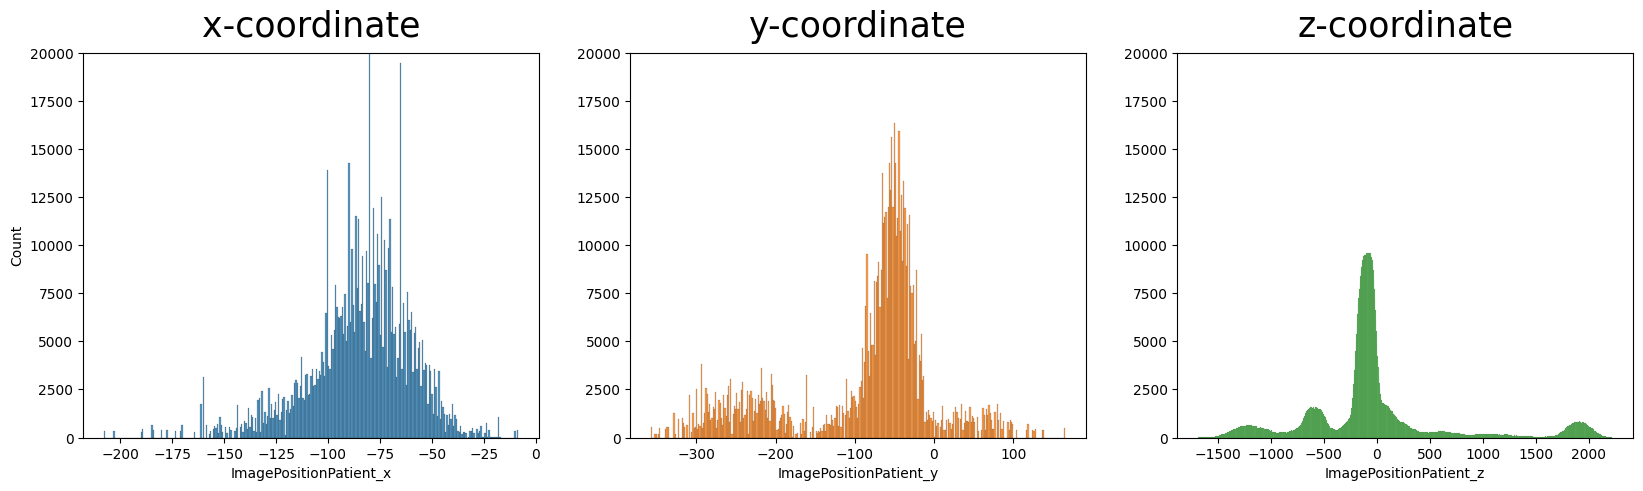

In [48]:
# Plot position coordinates
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(meta_train['ImagePositionPatient_x'])
plt.ylim([0,20000])
plt.title('x-coordinate', fontsize=25, y=1.02)

plt.subplot(1,3,2)
sns.histplot(meta_train['ImagePositionPatient_y'], color='C1')
plt.ylabel('')
plt.ylim([0,20000])
plt.title('y-coordinate', fontsize=25, y=1.02)

plt.subplot(1,3,3)
sns.histplot(meta_train['ImagePositionPatient_z'], color='C2')
plt.ylabel('')
plt.ylim([0,20000])
plt.title('z-coordinate', fontsize=25, y=1.02)


Podemos utilizar la función 'ImagePositionPatient_z' para deducir las vértebras presentes en cada corte

### Cajas delimitadoras

In [49]:
train_bbox = pd.read_csv("./rsna-2022-cervical-spine-fracture-detection/train_bounding_boxes.csv")


In [50]:
print(f'Patients with bounding box measurements: {train_bbox["StudyInstanceUID"].nunique()} ({np.round(100*train_bbox["StudyInstanceUID"].nunique()/len(train_df),1)} %)')


Patients with bounding box measurements: 235 (11.6 %)


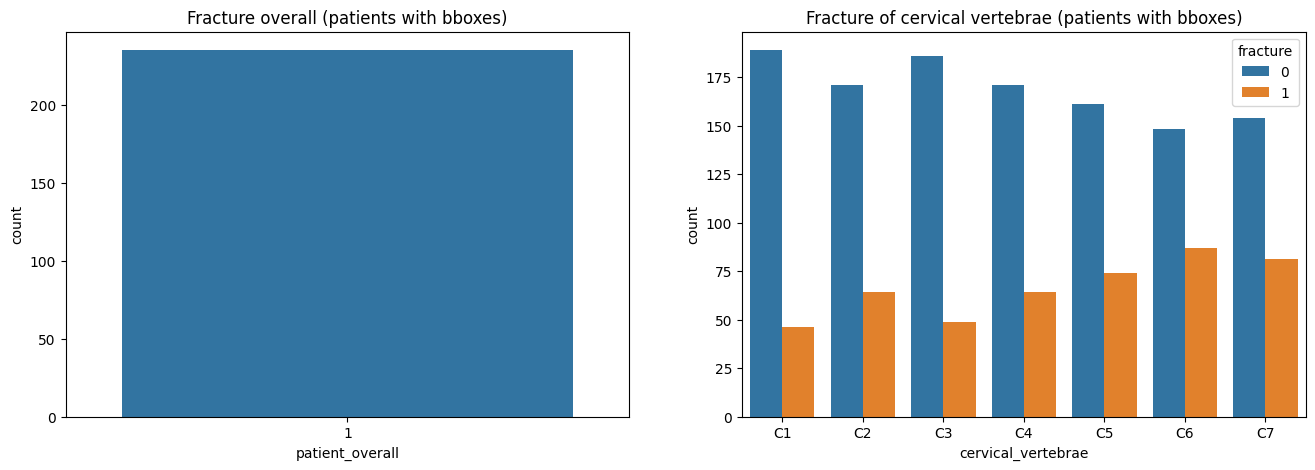

In [51]:
train_df_bbox = train_df[train_df["StudyInstanceUID"].isin(train_bbox["StudyInstanceUID"])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x="patient_overall", data=train_df_bbox, ax=ax1)
ax1.set_title("Fracture overall (patients with bboxes)")

train_df_bbox_melt = pd.melt(train_df_bbox, id_vars=["StudyInstanceUID", "patient_overall"], var_name="cervical_vertebrae", value_name="fracture")
sns.countplot(x="cervical_vertebrae", hue="fracture", data=train_df_bbox_melt, ax=ax2)
ax2.set_title("Fracture of cervical vertebrae (patients with bboxes)")
plt.show()


Text(0.5, 0, 'Number of bboxes')

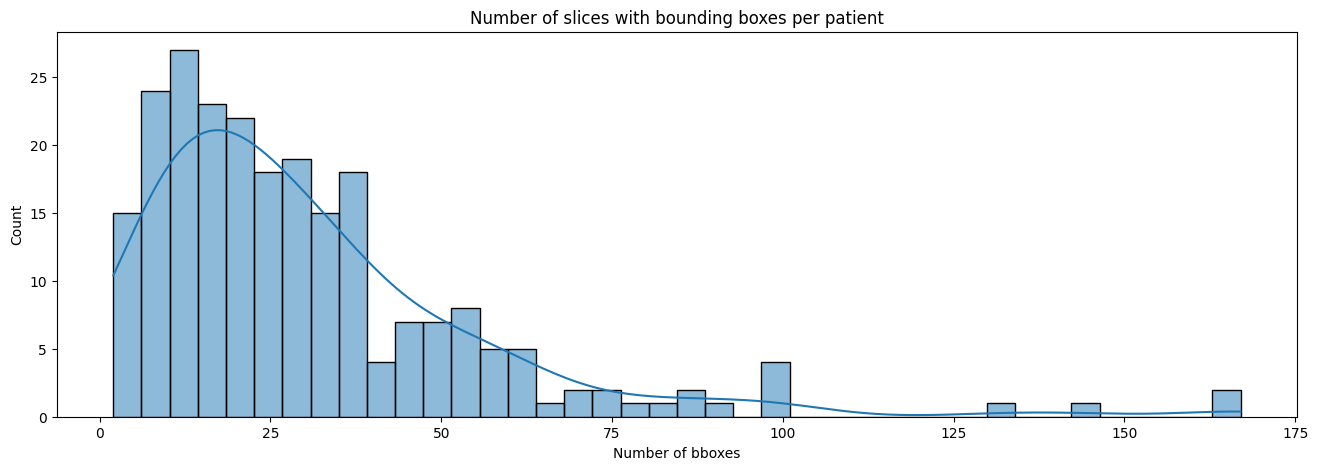

In [52]:
plt.figure(figsize=(16,5))
sns.histplot(train_bbox["StudyInstanceUID"].value_counts().values, kde=True, bins=40)
plt.title('Number of slices with bounding boxes per patient')
plt.xlabel('Number of bboxes')


Text(0.5, 1.0, 'Width and heights')

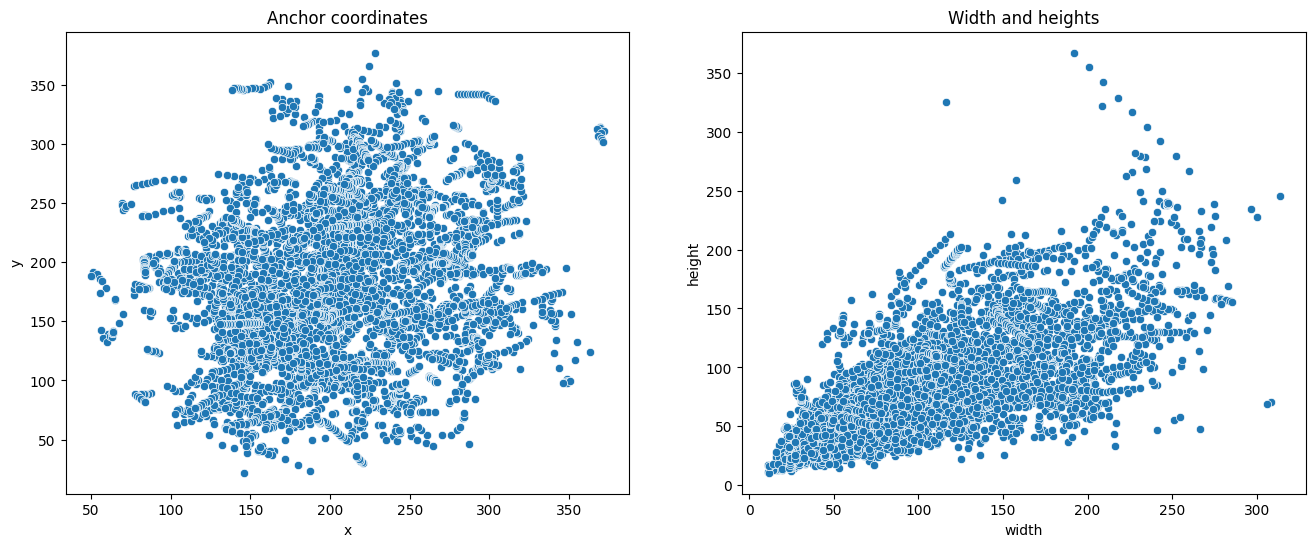

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=train_bbox, x='x', y='y')
plt.title('Anchor coordinates')

plt.subplot(1,2,2)
sns.scatterplot(data=train_bbox, x='width', y='height')
plt.title('Width and heights')


C:\Users\Jennifer\AppData\Local\Temp\ipykernel_22048\2876819031.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rect = patches.Rectangle((float(info.x), float(info.y)), float(info.width), float(info.height), linewidth=3, edgecolor='r', facecolor='none')


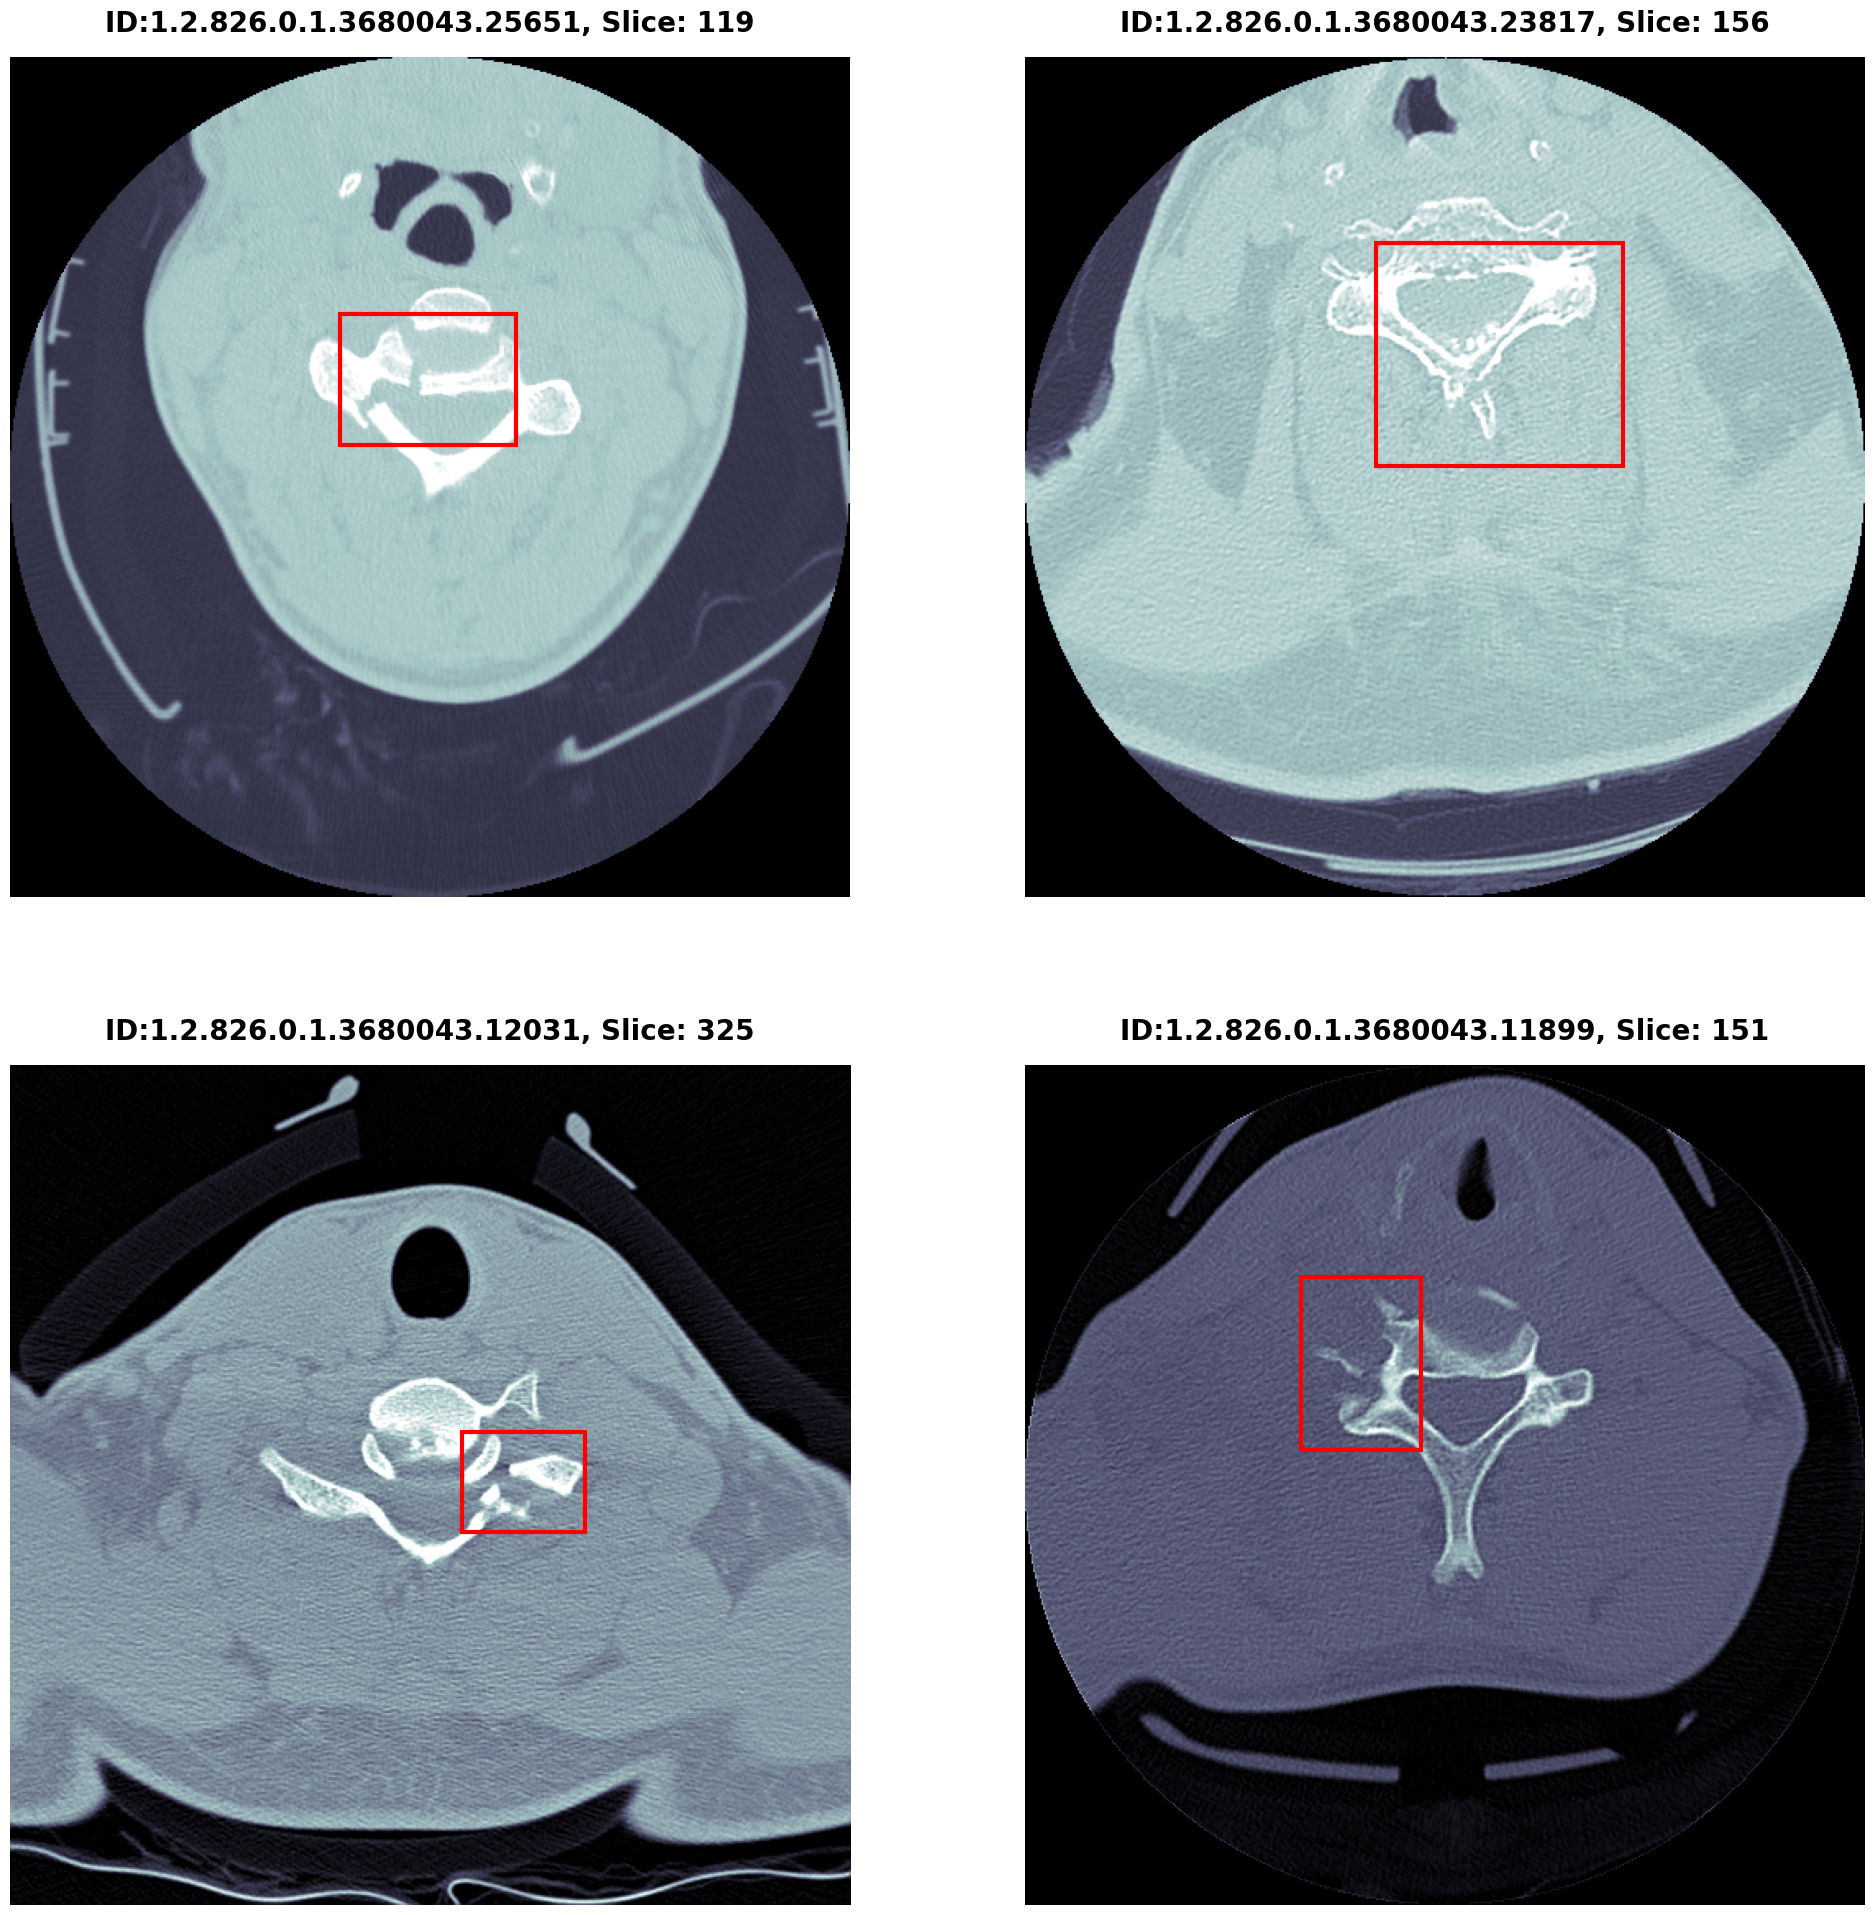

In [55]:
import matplotlib.patches as patches


def plot_fracture(slice_num,bbox_id,ax_id1,ax_id2):
    file = pydicom.dcmread(f"{base_path}/train_images/{bbox_id}/{slice_num}.dcm")
    img = apply_voi_lut(file.pixel_array, file)
    info = train_bbox[(train_bbox['StudyInstanceUID']==bbox_id)&(train_bbox['slice_number']==slice_num)]
    rect = patches.Rectangle((float(info.x), float(info.y)), float(info.width), float(info.height), linewidth=3, edgecolor='r', facecolor='none')

    axes[ax_id1,ax_id2].imshow(img, cmap="bone")
    axes[ax_id1,ax_id2].add_patch(rect)
    axes[ax_id1,ax_id2].set_title(f"ID:{bbox_id}, Slice: {slice_num}", fontsize=20, weight='bold',y=1.02)
    axes[ax_id1,ax_id2].axis('off')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,24))
plot_fracture(119,'1.2.826.0.1.3680043.25651',0,0)
plot_fracture(156,'1.2.826.0.1.3680043.23817',0,1)
plot_fracture(325,'1.2.826.0.1.3680043.12031',1,0)
plot_fracture(151,'1.2.826.0.1.3680043.11899',1,1)


# Modelos implementados

## CNN

Dado que la segmentación de vértebras es un problema de localización espacial, un modelo que maneje datos de imágenes directamente, como una CNN (red neuronal convolucional), podría ser más adecuado. Una CNN puede capturar patrones espaciales y texturales en las imágenes, lo que puede ayudar a localizar las vértebras de manera más precisa que los modelos basados únicamente en metadatos.

In [3]:
# Load dataframes
base_dir = r'./rsna-2022-cervical-spine-fracture-detection'
train_images = os.path.join(base_dir,'train_images')
test_images = os.path.join(base_dir,'test_images')
train_df = pd.read_csv("./rsna-2022-cervical-spine-fracture-detection/train.csv")
test_df = pd.read_csv("./rsna-2022-cervical-spine-fracture-detection/test.csv")
train_bbox = pd.read_csv("./rsna-2022-cervical-spine-fracture-detection/train_bounding_boxes.csv")
ss = pd.read_csv("./rsna-2022-cervical-spine-fracture-detection/sample_submission.csv")
segmentation_meta_data = pd.read_csv('./rsna-2022-spine-fracture-detection-metadata/meta_segmentation.csv')
meta_train_clean= pd.read_csv('./rsna-2022-spine-fracture-detection-metadata/meta_train_clean.csv')


# Print dataframe shapes
print('train shape:', train_df.shape)
print('train bbox shape:', train_bbox.shape)
print('test shape:', test_df.shape)
print('ss shape:', ss.shape)
print('segmentation_meta_data:', segmentation_meta_data.shape)

print('')

# Show first few entries
train_df.head(3)


train shape: (2019, 9)
train bbox shape: (7217, 6)
test shape: (3, 3)
ss shape: (3, 2)
segmentation_meta_data: (29832, 26)



StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0   1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1  1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0
2  1.2.826.0.1.3680043.21561                1   0   1   0   0   0   0   0

In [4]:
segmentation_meta_data.columns

Index(['Rows', 'Columns', 'SOPInstanceUID', 'ContentDate', 'SliceThickness',
       'InstanceNumber', 'ImagePositionPatientX', 'ImagePositionPatientY',
       'ImagePositionPatientZ', 'PhotometricInterpretation', 'PixelSpacingX',
       'PixelSpacingY', 'WindowCenter', 'WindowWidth', 'RescaleIntercept',
       'RescaleSlope', 'StudyInstanceUID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'Slice', 'SliceRatio'],
      dtype='object')

In [5]:
columns = ['StudyInstanceUID','SOPInstanceUID','C1','C2','C3','C4','C5','C6','C7']


In [6]:
seg_labels = segmentation_meta_data[columns]


In [7]:
seg_labels.head(2)


StudyInstanceUID                  SOPInstanceUID  C1  C2  C3  C4  \
0  1.2.826.0.1.3680043.1363   1.2.826.0.1.3680043.1363.1.12   0   0   0   0   
1  1.2.826.0.1.3680043.1363  1.2.826.0.1.3680043.1363.1.120   0   0   0   0   

   C5  C6  C7  
0   0   0   0  
1   1   1   0

In [8]:
#Get Slice instance number
seg_labels.loc[:,'slice'] = seg_labels['SOPInstanceUID'].apply(lambda x:x.split('.')[-1:][0])

C:\Users\Jennifer\AppData\Local\Temp\ipykernel_21612\2062957656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_labels.loc[:,'slice'] = seg_labels['SOPInstanceUID'].apply(lambda x:x.split('.')[-1:][0])


In [9]:
def load_dicom(path):
    '''Función para cargar y transformar imágenes DICOM'''
    img = pydicom.dcmread(path)
    
    # Obtén el array de píxeles
    data = img.pixel_array
    
    # Si la imagen tiene más de 8 bits por píxel, normalizamos a uint8
    if data.dtype != np.uint8:
        data = data - np.min(data)  # Escalar valores entre 0 y max
        data = (data / np.max(data)) * 255  # Normalizar a 255
        data = data.astype(np.uint8)  # Convertir a uint8
    
    # Si la imagen es en escala de grises (es probable para imágenes médicas)
    if len(data.shape) == 2:  # Imagen 2D, convertir a 3 canales si es necesario
        return cv2.cvtColor(data, cv2.COLOR_GRAY2RGB)
    
    return data

In [10]:
def ImgDataGenerator(train_df,base_path):
        '''Function to read dicom image path and store the images as numpy arrays'''
        trainset = []
        trainlabel = []
        for i in tqdm(range(len(train_df))):
            study_id = train_df.loc[i,'StudyInstanceUID']
            slice_id = train_df.loc[i,'slice']+'.dcm'
            study_path = study_id+'/'+slice_id
            
            path = os.path.join(base_path, study_path)
      
            #dc = dicom.read_file(os.path.join(path,im))
            #if dc.file_meta.TransferSyntaxUID.name =='JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])':
            #    continue
            img = load_dicom(path)
            img = cv2.resize(img, (128 , 128))
            image = img_to_array(img)
            image = image / 255.0
            trainset += [image]
            cur_label = [train_df.loc[i,f'C{j}'] for j in range(1,8)]
            trainlabel += [cur_label]

                         
                
        return np.array(trainset), np.array(trainlabel)

In [11]:
def RSNAImgArrayGenerator(ids,base_path):
    '''Function to generate numpy array for test dataset'''
           
    testset=[]
    for id in tqdm(ids):        
        path = os.path.join(base_path, id)
        if os.path.exists(path):
            for im in (os.listdir(path)):
                dc = pydicom.read_file(os.path.join(path,im))
                img=load_dicom(os.path.join(path,im))
                img=cv2.resize(img,(128, 128))
                image=img_to_array(img)
                image=image/255.0
                testset+=[image]
    return np.array(testset)

In [12]:
#Get list of study ids who doesn't have segmentation data
non_seg_train_ids = [id for id in train_df['StudyInstanceUID'].unique() if id not in seg_labels['StudyInstanceUID'].unique()]

In [13]:
len(non_seg_train_ids)

1932

In [14]:
#Fetch training data for study ids who doesn't have segmentation images
non_seg_train_data = train_df[train_df['StudyInstanceUID'].isin(non_seg_train_ids)]

In [15]:
non_seg_train_data.head(2)

StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0   1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1  1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0

In [16]:
#Convert train images of segmented studyids to array
X_seg,y_seg = ImgDataGenerator(seg_labels,train_images)

100%|██████████| 29832/29832 [08:24<00:00, 59.17it/s] 


In [17]:
#Uncomment this if you want to use the above output in the next run
#X_seg = np.load(r'/kaggle/input/identify-vertbrae-using-cnn/seg_train_images.npy')
#y_seg = np.load(r'/kaggle/input/identify-vertbrae-using-cnn/seg_train_images_labels.npy')

In [18]:
print(X_seg.shape,y_seg.shape)

(29832, 128, 128, 3) (29832, 7)


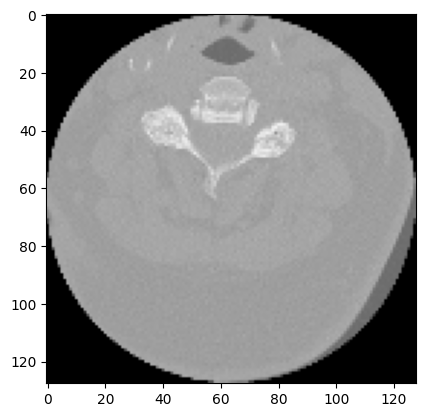

In [19]:
#Visualize a random CT scan image
plt.imshow(X_seg[500], cmap = 'bone')

In [24]:
#Find its segmentation value. 
y_seg[500]
#The above slice represents cervicals C3 and C4


array([0, 0, 1, 1, 0, 0, 0], dtype=int64)

Para aumentar la precisión y rendimiento en la segmentación de vértebras cervicales en el modelo de CNN, se decidió agregar capas convolucionales profundas, para extraer características más complejas de las imágenes. El uso de batch normalization, ayuda a estabilizar y acelerar el entrenamiento, permitiendo que la red aprenda más rápido y con mejores resultados, además del dropout, se le agrego regularización L2 a las capas densas para prevenir el sobreajuste.

Resaltando MaxPooling en todas las capas, reduce la dimensionalidad y ayuda a la red a enfocarse en las características más importantes.

In [25]:
def get_improved_cnn():
    '''Mejor CNN con más capas y batch normalization'''
    
    inp = tfl.Input((128, 128, 3))
    
    # Primera capa convolucional
    x = tfl.Conv2D(32, (3, 3), activation='relu')(inp)
    x = tfl.BatchNormalization()(x)
    x = tfl.MaxPooling2D((2, 2))(x)
    
    # Segunda capa convolucional
    x = tfl.Conv2D(64, (3, 3), activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.MaxPooling2D((2, 2))(x)
    
    # Tercera capa convolucional
    x = tfl.Conv2D(128, (3, 3), activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.MaxPooling2D((2, 2))(x)
    
    # Cuarta capa convolucional
    x = tfl.Conv2D(256, (3, 3), activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.MaxPooling2D((2, 2))(x)
    
    # Capa de Flatten para convertir los datos en un vector
    x = tfl.Flatten()(x)
    
    # Capa densa completamente conectada
    x = tfl.Dense(256, activation='relu')(x)
    x = tfl.Dropout(0.5)(x)
    
    # Salida con 7 neuronas para las 7 vértebras (C1-C7)
    out = tfl.Dense(7, activation='sigmoid')(x)
    
    # Modelo final
    model = tf.keras.models.Model(inputs=inp, outputs=out)
    
    # Compilación del modelo
    model.compile(
        loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    
    model.summary()
    
    return model


In [26]:
# Primero, divide en 85% entrenamiento y validación, 15% para prueba
X_trainval, X_test, y_trainval, y_test = train_test_split(X_seg, y_seg, test_size=0.15, random_state=42)

# Luego, divide el 85% restante en 70% para entrenamiento y 15% para validación (70/85 ≈ 0.8235)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1765, random_state=42)

print("Tamaños del conjunto de datos:")
print(f"Entrenamiento: {X_train.shape}")
print(f"Validación: {X_val.shape}")
print(f"Prueba: {X_test.shape}")

Tamaños del conjunto de datos:
Entrenamiento: (20881, 128, 128, 3)
Validación: (4476, 128, 128, 3)
Prueba: (4475, 128, 128, 3)


In [27]:
model = get_improved_cnn()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751,687 (10.50 MB)

 Trainable params: 2,750,727 (10.49 MB)

 Non-trainable params: 960 (3.75 KB)

### Entrenamiento

El modelo se entrenará con early stooping el cual es una estrategia óptima, permitiendo que el modelo entre durante una cantidad de épocas, pero se detiene el entrenamiento cuando el rendimiento en el conjunto de validación deja de mejorar, lo que ayuda a encontrar el punto justo antes de que el modelo comience a sobreajustarse.

Esto monitorea el rendimiento en el conjunto de validación y detiene el entrenamiento si la pérdida no mejora después de 3 épocas.

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64,                                    callbacks=[early_stopping])

Epoch 1/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 257s 775ms/step - binary_accuracy: 0.8425 - loss: 0.3819 - precision: 0.5069 - recall: 0.3794 - val_binary_accuracy: 0.8371 - val_loss: 0.5092 - val_precision: 0.3877 - val_recall: 0.0638
Epoch 2/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 235s 719ms/step - binary_accuracy: 0.9187 - loss: 0.1881 - precision: 0.7738 - recall: 0.6817 - val_binary_accuracy: 0.9379 - val_loss: 0.1580 - val_precision: 0.8007 - val_recall: 0.8056
Epoch 3/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 234s 717ms/step - binary_accuracy: 0.9472 - loss: 0.1287 - precision: 0.8489 - recall: 0.8067 - val_binary_accuracy: 0.9708 - val_loss: 0.0827 - val_precision: 0.9293 - val_recall: 0.8809
Epoch 4/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 233s 712ms/step - binary_accuracy: 0.9626 - loss: 0.0949 - precision: 0.8918 - recall: 0.8659 - val_binary_accuracy: 0.9778 - val_loss: 0.0637 - val_precision: 0.9536 - val_recall: 0.9029
Epoch 5/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 232s 709ms/step - binary_accuracy: 0.9720 - loss

In [30]:
# Evaluación en el conjunto de prueba
score = model.evaluate(X_test, y_test, batch_size=64)


70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - binary_accuracy: 0.9898 - loss: 0.0273 - precision: 0.9738 - recall: 0.9615


In [31]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028136488050222397
Test accuracy: 0.9896570444107056


In [32]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Umbral de 0.5 para clasificar

print(classification_report(y_test, y_pred_classes, target_names=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']))


140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step
              precision    recall  f1-score   support

          C1       0.97      0.94      0.95       610
          C2       0.98      0.97      0.97       971
          C3       0.97      0.94      0.96       596
          C4       0.97      0.98      0.97       625
          C5       0.98      0.95      0.96       675
          C6       0.97      0.97      0.97       697
          C7       0.97      0.98      0.98       748

   micro avg       0.97      0.96      0.97      4922
   macro avg       0.97      0.96      0.97      4922
weighted avg       0.97      0.96      0.97      4922
 samples avg       0.62      0.61      0.61      4922



c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [33]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test, y_pred_classes)
print(mcm)

[[[3848   17]
  [  37  573]]

 [[3484   20]
  [  29  942]]

 [[3861   18]
  [  34  562]]

 [[3828   22]
  [  15  610]]

 [[3785   15]
  [  35  640]]

 [[3755   23]
  [  22  675]]

 [[3708   19]
  [  18  730]]]


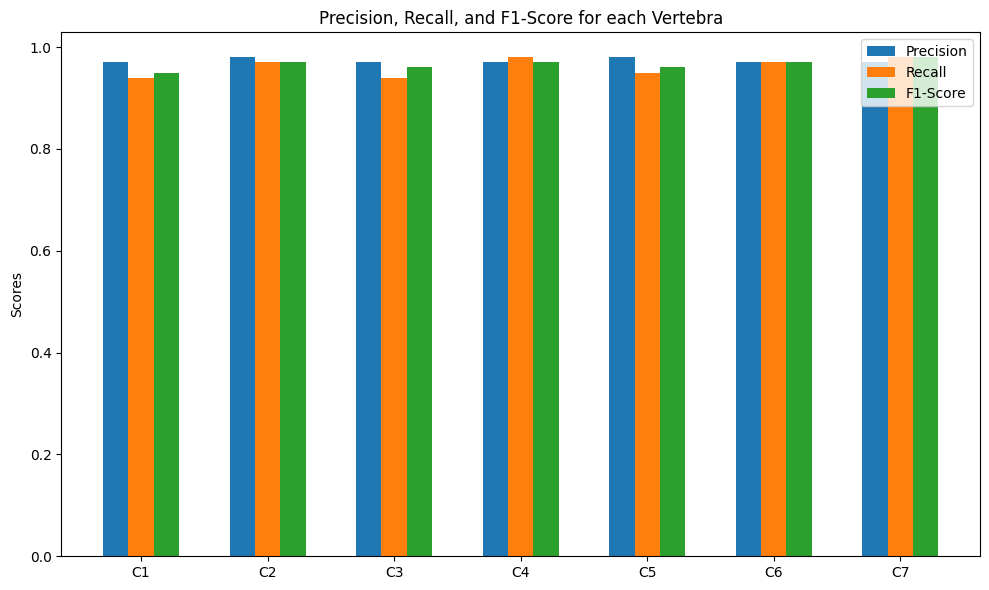

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

precision = [0.97, 0.98, 0.97, 0.97, 0.98, 0.97, 0.97]
recall = [0.94, 0.97, 0.94, 0.98, 0.95, 0.97, 0.98]
f1_score = [0.95, 0.97, 0.96, 0.97, 0.96, 0.97, 0.98]

x = np.arange(len(labels))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for each Vertebra')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()



Este gráfico muestra la precisión, recall y f1-score para cada una de las vértebras (C1-C7). Permite ver cómo el modelo se desempeña en cada vértebra en términos de estas métricas clave, tiene un rendimiento consistente y alto en todas las métricas para las siete vértebras, lo que indica una clasificación robusta.

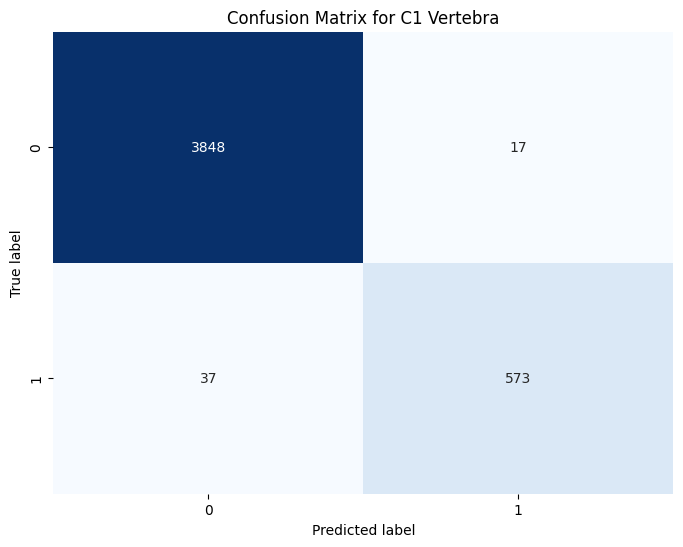

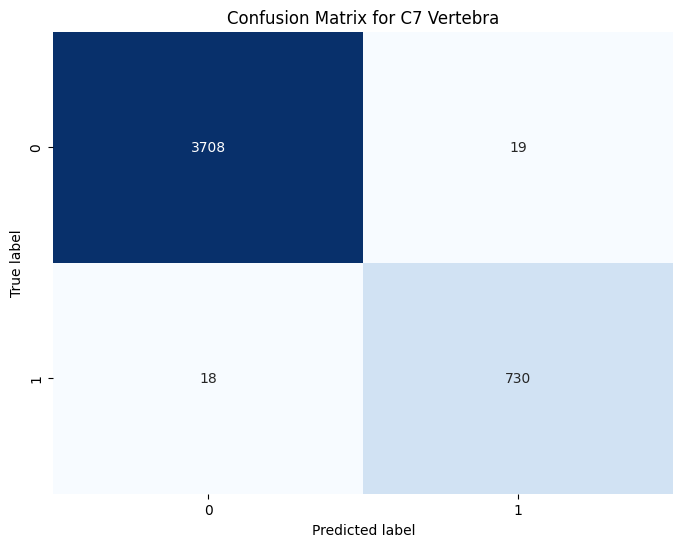

In [36]:
# 2. Confusion Matrix Visualization for C1 vertebra
conf_matrix_C1 = np.array([[3848, 17], [37, 573]])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_C1, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix for C1 Vertebra')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 3. Confusion Matrix Visualization for C7 vertebra
conf_matrix_C7 = np.array([[3708, 19], [18, 730]])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_C7, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix for C7 Vertebra')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Observando la matriz de confusión para la vértebra C1, se muestra cómo se comporta el modelo en la clasificación de la vértebra C1. Los valores en las diagonales indican las predicciones correctas, mientras que los valores fuera de las diagonales son los errores.

Matriz de confusión para la vértebra C7, similar a la de C1, pero para la vértebra C7, permite observar las predicciones correctas y los errores específicos para esta vértebra.

Las matrices de confusión muestran que el modelo realiza un buen trabajo al clasificar correctamente las fracturas en C1 y C7, con relativamente pocos errores.

## Modelo Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Paso 1: Seleccionar las características relevantes
# Ajustar los nombres de las columnas según el DataFrame
features = ['Rows', 'Columns', 'SliceThickness', 'SliceRatio', 
            'ImagePositionPatientX', 'ImagePositionPatientY', 'ImagePositionPatientZ']

X = segmentation_meta_data[features]  # Características (metadata)
y = segmentation_meta_data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']]  # Etiquetas



In [48]:
# Paso 2: Dividir los datos (70% entrenamiento, 15% validación, 15% prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


In [49]:
# Paso 3: Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

Monitorear el rendimiento en el conjunto de validación en cada iteración para simular una especie de early stopping, deteniéndote cuando el rendimiento empieza a disminuir en el conjunto de validación.

In [50]:
# Paso 4: Hacer predicciones en el conjunto de validación
y_val_pred = rf_model.predict(X_val)


In [51]:
# Paso 5: Evaluar el modelo en el conjunto de validación
print("Accuracy en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))


Accuracy en validación: 0.9499441340782123
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       602
           1       0.99      0.98      0.98       995
           2       0.97      0.98      0.97       591
           3       0.98      0.98      0.98       618
           4       0.97      0.97      0.97       652
           5       0.98      0.97      0.98       660
           6       0.98      0.97      0.97       743

   micro avg       0.98      0.97      0.98      4861
   macro avg       0.98      0.97      0.98      4861
weighted avg       0.98      0.97      0.98      4861
 samples avg       0.61      0.61      0.61      4861



c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [52]:
# Paso 6: Evaluar el modelo final en el conjunto de prueba
y_test_pred = rf_model.predict(X_test)
print("Accuracy en prueba:", accuracy_score(y_test, y_test_pred))
print("Reporte de clasificación en prueba:\n", classification_report(y_test, y_test_pred))


Accuracy en prueba: 0.9510614525139665
Reporte de clasificación en prueba:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       607
           1       0.97      0.98      0.98       972
           2       0.96      0.98      0.97       634
           3       0.97      0.98      0.98       667
           4       0.98      0.98      0.98       635
           5       0.99      0.98      0.98       631
           6       0.99      0.98      0.98       722

   micro avg       0.98      0.98      0.98      4868
   macro avg       0.98      0.98      0.98      4868
weighted avg       0.98      0.98      0.98      4868
 samples avg       0.62      0.62      0.61      4868



c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jennifer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

### Matriz de confusión

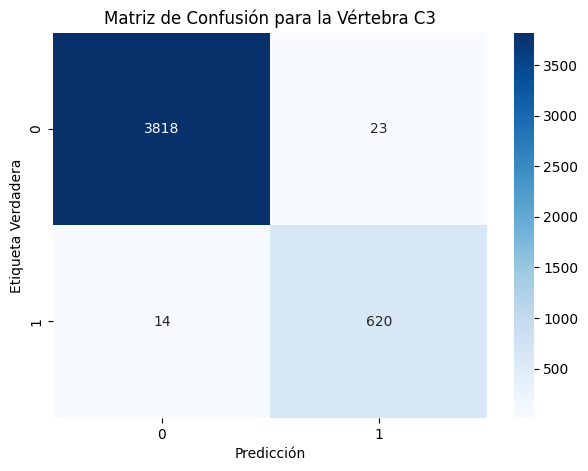

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión para la vértebra C3 usando el nombre de la columna
cm = confusion_matrix(y_test['C3'], y_test_pred[:, 2])  # Etiquetas reales para C3 y predicciones

# Visualizar la matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para la Vértebra C3')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()


# C7 (27,22%) y C2 (19,74%) las que presentan la mayor proporción. C3 (5,06%) y C4 (7,48%) tienen la porción más baja.

Aunque C3 tiene una proporción baja de fracturas, el modelo parece estar manejando bien este desbalance. Esto podría deberse a que el modelo de Random Forest es robusto frente al desbalance en los datos. Los falsos positivos y negativos son bajos, lo que significa que el modelo tiene un buen rendimiento incluso en vértebras con menos fracturas.

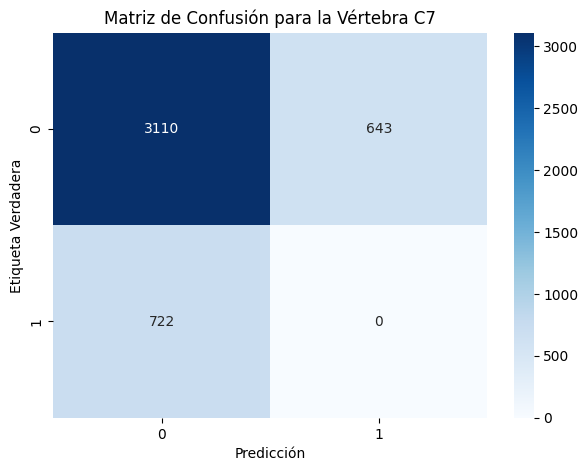

In [55]:
# Crear la matriz de confusión para la vértebra C3 usando el nombre de la columna
cm = confusion_matrix(y_test['C7'], y_test_pred[:, 2])  # Etiquetas reales para C3 y predicciones

# Visualizar la matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para la Vértebra C7')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()


El modelo no está logrando identificar correctamente ninguna fractura en la vértebra C7 (es decir, no hay verdaderos positivos), lo cual es un problema importante.

El modelo predice demasiados falsos negativos (722), lo que significa que hay muchas instancias donde el modelo debería haber identificado una fractura, pero no lo hizo.
Además, el número de falsos positivos (643) es alto, lo que significa que el modelo está prediciendo fracturas donde no existen.


C7 tiene una de las mayores proporciones de fracturas (27.22%), pero es posible que el modelo esté sesgado hacia la clase negativa debido a un desbalance entre las clases o a un mal ajuste para esta vértebra.

In [56]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 487.6 kB/s eta 0:04:17
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:49
   ---------------------------------------- 0.2/124.9 MB 1.4 MB/s eta 0:01:27
   ---------------------------------------- 0.5/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 0.9/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.2/124.9 MB 4.4 MB/s eta 0:00:29
   ---------------------------------------- 1.5/124.9 MB 5.2 MB/s eta 0:00:24
   ---------------------------------------- 1.5/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 1.6/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.0/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 2.4/124.9 MB 4.8 MB/s eta 0:00:2


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Paso 1: Seleccionar las etiquetas para la vértebra C3
y_train_c3 = y_train['C3']
y_test_c3 = y_test['C3']

# Paso 2: Crear y entrenar el modelo SVM para C3
svm_model_c3 = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model_c3.fit(X_train, y_train_c3)

# Paso 3: Hacer predicciones en el conjunto de prueba para C3
y_test_pred_c3 = svm_model_c3.predict(X_test)

# Paso 4: Evaluar el modelo para C3
print("Accuracy en prueba con SVM para C3:", accuracy_score(y_test_c3, y_test_pred_c3))
print("Reporte de clasificación en prueba para C3:\n", classification_report(y_test_c3, y_test_pred_c3))


Accuracy en prueba con SVM para C3: 0.48022346368715085
Reporte de clasificación en prueba para C3:
               precision    recall  f1-score   support

           0       0.86      0.47      0.61      3841
           1       0.14      0.54      0.23       634

    accuracy                           0.48      4475
   macro avg       0.50      0.51      0.42      4475
weighted avg       0.76      0.48      0.55      4475



In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Paso 1: Seleccionar las etiquetas para la vértebra C7
y_train_C7 = y_train['C7']
y_test_C7 = y_test['C7']

# Paso 2: Crear y entrenar el modelo SVM para C7
svm_model_C7 = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model_C7.fit(X_train, y_train_C7)

# Paso 3: Hacer predicciones en el conjunto de prueba para C7
y_test_pred_C7 = svm_model_C7.predict(X_test)

# Paso 4: Evaluar el modelo para C7
print("Accuracy en prueba con SVM para C7:", accuracy_score(y_test_C7, y_test_pred_C7))
print("Reporte de clasificación en prueba para C7:\n", classification_report(y_test_C7, y_test_pred_C7))


Accuracy en prueba con SVM para C7: 0.537877094972067
Reporte de clasificación en prueba para C7:
               precision    recall  f1-score   support

           0       0.87      0.53      0.66      3753
           1       0.19      0.58      0.29       722

    accuracy                           0.54      4475
   macro avg       0.53      0.56      0.47      4475
weighted avg       0.76      0.54      0.60      4475

